## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Project Information

* Student name: **Andrew Maina**
* Student pace: **part time**
* Scheduled project review date/time: **Monday 6th Nov 2023**
* Instructor name: **Everlyne Asiko**
* Blog post url: **_____________________**

## Business Understanding

Microsoft, an American multinational technology corporation, has taken interest in all the big companies that are creating products in the niche of **creating original video content** and wants to venture in as well.

They have created a movie studio but have inadequate knowledge and expertise to create movies.

This project explores trends in movies that are currently performing well in the market. Valuable information obtained will be used to provide actionable insights that can help Microsoft decide on the **type of films** to create.

In [1]:
# Explain datasets to be used and add links

In [2]:
# Import the packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

# Exploratory data analysis

Let's explore properties of the provided datasets to know more about the structure and features in the databases 

## Box Office Mojo

In [3]:
bom_movie_gross = pd.read_csv('./zippedData/bom.movie_gross.csv.gz', encoding='utf-8')
bom_movie_gross.sample(10)

,title,studio,domestic_gross,foreign_gross,year
986,"For a Good Time, Call...",Focus,1300000.0,NaN,2012
2451,Keeping Up with the Joneses,Fox,14900000.0,15000000,2016
2254,Wild City,WGUSA,34900.0,NaN,2015
1986,The Gallows,WB (NL),22800000.0,20200000,2015
755,John Carter,BV,73100000.0,211100000,2012
2038,Me and Earl and the Dying Girl,FoxS,6800000.0,2300000,2015
1375,The Hunt,Magn.,613000.0,NaN,2013
2859,Tyler Perry's Boo 2! A Madea Halloween,LGF,47300000.0,1000000,2017
2006,American Ultra,LGF,14400000.0,12700000,2015
531,Even the Rain,Vita.,518000.0,5300000,2011


We can see that the dataset contains 5 columns:
1. title - The movie title
2. studio - The studio that produced the movie
3. domestic_gross - The gross revenue earned from the movie in the country of origin in USD dollars
4. foreign_gross - Gross earnings outside country of origin in US dollars
5. year - Year when the movie was released

The gross columns contains figures rounded up to 4 significant figures. Reference [BOM]()

In [4]:
bom_movie_gross.describe(include="all")

,title,studio,domestic_gross,foreign_gross,year
count,3387,3382,3.359000e+03,2037,3387.000000
unique,3386,257,NaN,1204,NaN
top,Bluebeard,IFC,NaN,1200000,NaN
freq,2,166,NaN,23,NaN
mean,NaN,NaN,2.874585e+07,NaN,2013.958075
std,NaN,NaN,6.698250e+07,NaN,2.478141
min,NaN,NaN,1.000000e+02,NaN,2010.000000
25%,NaN,NaN,1.200000e+05,NaN,2012.000000
50%,NaN,NaN,1.400000e+06,NaN,2014.000000
75%,NaN,NaN,2.790000e+07,NaN,2016.000000


In [5]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Based on the `.describe()` output,we have 3386 uniqu records. The data consists of movies released between `2010` and `2018`

The minimum domestic gross is `100.0000`USD and maximum is `936,700,000,000` USD. The `foreign gross` has missing data and unhelpful info at the moment.

There are 3387 entries in the dataset with `studio`, `domestic_gross` and `foreign_gross` with some empty data.
The data in `foreign_gross` column is an object which means values have a string type 



In [6]:
bom_movie_gross.duplicated().value_counts()

False    3387
dtype: int64

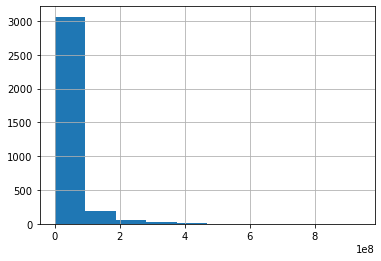

In [7]:
bom_movie_gross['domestic_gross'].hist();

<AxesSubplot:>

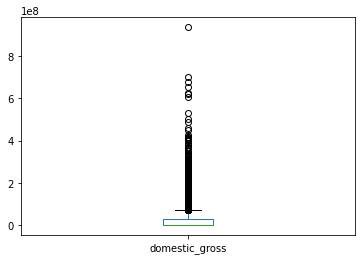

In [8]:
bom_movie_gross['domestic_gross'].plot.box()

In [9]:
bom_group_year = bom_movie_gross.groupby('year')['domestic_gross'].sum()/10e4
bom_group_year

year
2010    101569.26399
2011    100641.58200
2012    108766.05997
2013    107923.29897
2014    103377.38499
2015    110514.05394
2016    112536.53097
2017    109332.66198
2018    110912.09899
Name: domestic_gross, dtype: float64

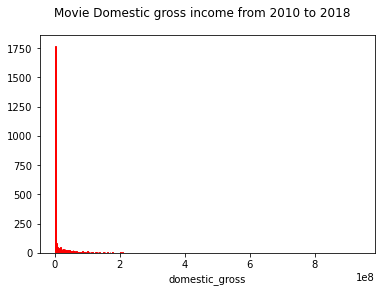

In [10]:
figure, axes = plt.subplots();

bom_gross_dropna = bom_movie_gross['domestic_gross'].dropna()
x = bom_movie_gross['domestic_gross'].dropna().apply(int)
figure.suptitle('Movie Domestic gross income from 2010 to 2018')
axes.hist(x, bins=500, edgecolor='red')
axes.set_xlabel('domestic_gross');

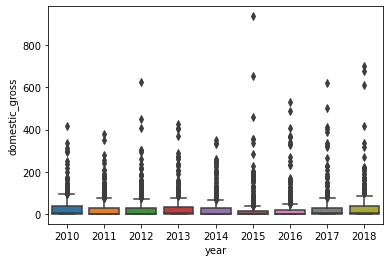

In [11]:
sns.boxplot(
    y=bom_gross_dropna /10e5,
    x=bom_movie_gross['year']
);

In [12]:
# bom_movie_gross.hist(bom_movie_gross['domestic_gross'].dropna(), bins=10);

### Name database
Let's explore the database of people involved in the movies from imdb

In [13]:
name_basics = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
name_basics.sample(10)

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
73740,nm10052845,Mark Attard,NaN,NaN,composer,tt8841754
556323,nm8978727,Georg Johansson,NaN,NaN,actor,tt6866734
302871,nm5767569,Deborah Almeida,NaN,NaN,art_department,"tt2948230,tt8325484"
444423,nm8111386,Liz Beckett,NaN,NaN,actress,tt5679088
380814,nm5414752,Renata Fasanella,NaN,NaN,actress,"tt2650940,tt5454986,tt2569066"
151568,nm1909130,Claudie Viguerie,NaN,NaN,producer,"tt1533058,tt0382761"
492609,nm7524267,Bryan Mullins,NaN,NaN,"editor,director,cinematographer",tt4947422
589771,nm5998664,Plamen Yoshkata,NaN,NaN,composer,tt3241890
57716,nm10640959,Tresequis,NaN,NaN,NaN,NaN
263440,nm5507722,Ania Gauer,NaN,NaN,"actress,producer,writer","tt7307876,tt6927206,tt5547846,tt7583274"


In [14]:
name_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [15]:
name_basics.isna().sum()

nconst                     0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
known_for_titles       30204
dtype: int64

We can see that all columns except nconst and primary_name have some missing values in a dataset of 606648 entries.

Information about the columns can be found here - [IMDB name basics](https://developer.imdb.com/non-commercial-datasets/#namebasicstsvgz)

The dataset contains 6 columns:
1. nconst (string) - alphanumeric unique identifier of the name/person
2. primaryName (string)– name by which the person is most often credited
3. birthYear – in YYYY format
4. deathYear – in YYYY format if applicable, else '\N'
5. primaryProfession (array of strings)– the top-3 professions of the person
6. knownForTitles (array of tconsts) – titles the person is known for.

#### Reference - [IMDB Non-Commercial Datasets](https://developer.imdb.com/non-commercial-datasets/#:~:text=IMDb%20Non%2DCommercial%20Datasets)
---

### [3.Title database](#3.Title-database)
Let's explore the movie titles

In [16]:
title_akas = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
title_akas.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [17]:
title_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [18]:
title_akas.isna().sum()

title_id                  0
ordering                  0
title                     0
region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64

There are `331703` entries in the database. `region`, `language`, `types`, `attributes` and `is_original_title` have some missing columns.

The dataset contains 8 columns:
1. titleId (string) - a tconst, an alphanumeric unique identifier of the title
2. ordering (integer) – a number to uniquely identify rows for a given titleId
3. title (string) – the localized title
4. region (string) - the region for this version of the title
5. language (string) - the language of the title
6. types (array) - Enumerated set of attributes for this alternative title. One or more of the following: "alternative", "dvd", "festival", "tv", "video", "working", "original", "imdbDisplay". New values may be added in the future without warning
7. attributes (array) - Additional terms to describe this alternative title, not enumerated
8. isOriginalTitle (boolean) – 0: not original title; 1: original title

> Information about the columns can be found here - [IMDB title akas](https://developer.imdb.com/non-commercial-datasets/#titleakastsvgz)

In [19]:
title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [20]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [21]:
title_basics.describe(include='all')

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
count,146144,146144,146123,146144.000000,114405.000000,140736
unique,146144,136071,137773,NaN,NaN,1085
top,tt1782550,Home,Broken,NaN,NaN,Documentary
freq,1,24,19,NaN,NaN,32185
mean,NaN,NaN,NaN,2014.621798,86.187247,NaN
std,NaN,NaN,NaN,2.733583,166.360590,NaN
min,NaN,NaN,NaN,2010.000000,1.000000,NaN
25%,NaN,NaN,NaN,2012.000000,70.000000,NaN
50%,NaN,NaN,NaN,2015.000000,87.000000,NaN
75%,NaN,NaN,NaN,2017.000000,99.000000,NaN


In [22]:
title_basics.groupby('genres').count()

,tconst,primary_title,original_title,start_year,runtime_minutes
genres,,,,,
Action,2219,2219,2219,2219,1153
"Action,Adult,Comedy",2,2,2,2,1
"Action,Adventure",114,114,114,114,81
"Action,Adventure,Animation",197,197,197,197,173
"Action,Adventure,Biography",34,34,34,34,29
...,...,...,...,...,...
"Thriller,War,Western",1,1,1,1,1
"Thriller,Western",4,4,4,4,2
War,131,131,131,131,60


In [23]:
title_basics.groupby('start_year').count()

,tconst,primary_title,original_title,runtime_minutes,genres
start_year,,,,,
2010,11849,11849,11849,9986,11452
2011,12900,12900,12900,10707,12432
2012,13787,13787,13786,11405,13356
2013,14709,14709,14708,12308,14298
2014,15589,15589,15589,12964,15095
2015,16243,16243,16242,13252,15569
2016,17272,17272,17269,13514,16353
2017,17504,17504,17494,13466,16816
2018,16849,16849,16846,12213,16293


There are `146144` entries in the database. `original_title`, `runtime_minutes`, `types`, `attributes` and `genres` have some missing columns.

The dataset contains 8 columns:
1. tconst (string) - alphanumeric unique identifier of the title
2. titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
3. primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
4. originalTitle (string) - original title, in the original language
5. isAdult (boolean) - 0: non-adult title; 1: adult title
6. startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
7. endYear (YYYY) – TV Series end year. ‘\N’ for all other title types
8. runtimeMinutes – primary runtime of the title, in minutes
9. genres (string array) – includes up to three genres associated with the title separated by commas

> Information about the columns can be found here - [IMDB title basics](https://developer.imdb.com/non-commercial-datasets/#titlebasicstsvgz)

---

### [4.Title crew](#4.Title-crew)
Let's explore the movie titles' crew

In [24]:
title_crew = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
title_crew.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [35]:
title_crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [45]:
title_crew.isna().sum()

tconst           0
directors     5727
writers      35883
dtype: int64

There are `146144` entries in the database. Some columns like `original_title`, `directors` and `writers` have some missing data.

The dataset contains 3 columns:

1. tconst (string) - alphanumeric unique identifier of the title
2. directors (array of nconsts) - director(s) of the given title
3. writers (array of nconsts) – writer(s) of the given title

Information about the columns can be found here - [IMDB title crew](https://developer.imdb.com/non-commercial-datasets/#titlecrewtsvgz)

---

In [48]:
title_principals = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
title_principals.sample(5)

,tconst,ordering,nconst,category,job,characters
926727,tt8747684,2,nm10002901,self,NaN,"[""Himself""]"
632098,tt5071886,5,nm3163794,director,NaN,NaN
258049,tt1843175,9,nm0773740,actor,NaN,"[""Le chauffeur""]"
396089,tt2368749,3,nm5012141,actor,NaN,"[""José""]"
782107,tt5669930,2,nm7679333,actress,NaN,NaN


In [46]:
title_principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


There are `1028186` entries in the database. Some columns like `original_title`, `directors` and `writers` have some missing data.

The dataset contains 6 columns:

1. tconst (string) - alphanumeric unique identifier of the title
2. ordering (integer) – a number to uniquely identify rows for a given titleId
3. nconst (string) - alphanumeric unique identifier of the name/person
4. category (string) - the category of job that person was in
5. job (string) - the specific job title if applicable, else '\N'
6. characters (string) - the name of the character played if applicable, else '\N'

Information about the columns can be found here - [IMDB title crew](https://developer.imdb.com/non-commercial-datasets/#titlecrewtsvgz)

---

In [26]:
title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [49]:
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


There are `73856` entries in the database. No columns are missing any data
The dataset contains 3 columns:

1. tconst (string) - alphanumeric unique identifier of the title
2. averageRating – weighted average of all the individual user ratings
3. numVotes - number of votes the title has received

Information about the columns can be found here - [IMDB title ratings](https://developer.imdb.com/non-commercial-datasets/#titleratingstsvgz)

---

In [27]:
rt_movie_info = pd.read_table('zippedData/rt.movie_info.tsv.gz')
rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [67]:
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [68]:
rt_movie_info.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

There are `1560` entries in the database. Some columns are missing data
The dataset contains 3 columns:

1. 

---

In [28]:
rt_reviews = pd.read_table('zippedData/rt.reviews.tsv.gz', encoding='unicode_escape')
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [69]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [71]:
rt_reviews.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [72]:
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz', index_col=0)
tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [70]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


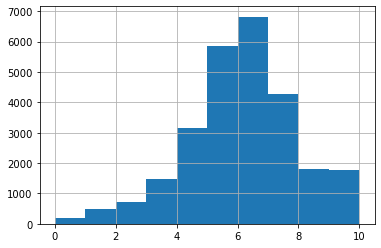

In [74]:
tmdb_movies['vote_average'].hist();

In [78]:
tmdb_movies.corr()

,id,popularity,vote_average,vote_count
id,1.000000,-0.148720,0.116085,-0.130221
popularity,-0.148720,1.000000,0.065273,0.694849
vote_average,0.116085,0.065273,1.000000,0.086370
vote_count,-0.130221,0.694849,0.086370,1.000000


In [79]:
tmdb_movies.describe(include='all')

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
count,26517,26517.000000,26517,26517,26517.000000,26517,26517,26517.000000,26517.000000
unique,2477,NaN,76,24835,NaN,3433,24688,NaN,NaN
top,[99],NaN,en,Eden,NaN,2010-01-01,Home,NaN,NaN
freq,3700,NaN,23291,7,NaN,269,7,NaN,NaN
mean,NaN,295050.153260,NaN,NaN,3.130912,NaN,NaN,5.991281,194.224837
std,NaN,153661.615648,NaN,NaN,4.355229,NaN,NaN,1.852946,960.961095
min,NaN,27.000000,NaN,NaN,0.600000,NaN,NaN,0.000000,1.000000
25%,NaN,157851.000000,NaN,NaN,0.600000,NaN,NaN,5.000000,2.000000
50%,NaN,309581.000000,NaN,NaN,1.374000,NaN,NaN,6.000000,5.000000
75%,NaN,419542.000000,NaN,NaN,3.694000,NaN,NaN,7.000000,28.000000


In [32]:
movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [33]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The dataset contains `5782` entries all of which are non-null, therefore there are no mising values.
We can see that the dataset contains 6 columns:
1. id - Id of the movie
2. release_date - The date the movie was released.
3. movie - The movie name.
4. production_budget - Cost for making the movie in US Dollars
5. domestic_gross - Gross amount made in North America (U.S., Canada, and Puerto Rico).
6. worldwide_gross - Gross amount made from the rest of the world.

### Glossary
[Domestic](https://help.imdb.com/article/imdbpro/industry-research/box-office-mojo-by-imdbpro-faq/GCWTV4MQKGWRAUAP?ref_=mojo_ftr_help#:~:text=around%20the%20world.-,What%20do%20%22domestic%22%20and%20%22international%22%20mean%3F,-%22Domestic%22%20refers%20to)

The gross columns contains figures rounded up to 4 significant figures. Reference [BOM]()

The production_budget, domestic_gross, worldwide_gross are have object (string) data types
which can be converted to integers so as to calculate some metrics (means etc.) and plot some graphs.
* Extract year and/or months from the date column to use in getting information about the relationship between gross sales and the months.

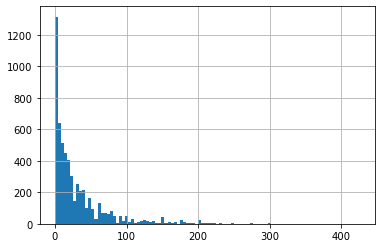

In [34]:
prod_budget = movie_budgets['production_budget'].apply(lambda budget: int(budget.strip('$').replace(",", ""))/10e5).hist(bins=100)